3940/3940 - 123s - loss: 1.1163e-04 - 123s/epoch - 31ms/step
90/90 [==============================] - 5s 28ms/step


array([[132.06555],
       [131.83627],
       [131.40698],
       ...,
       [444.4418 ],
       [443.31052],
       [443.3289 ]], dtype=float32)

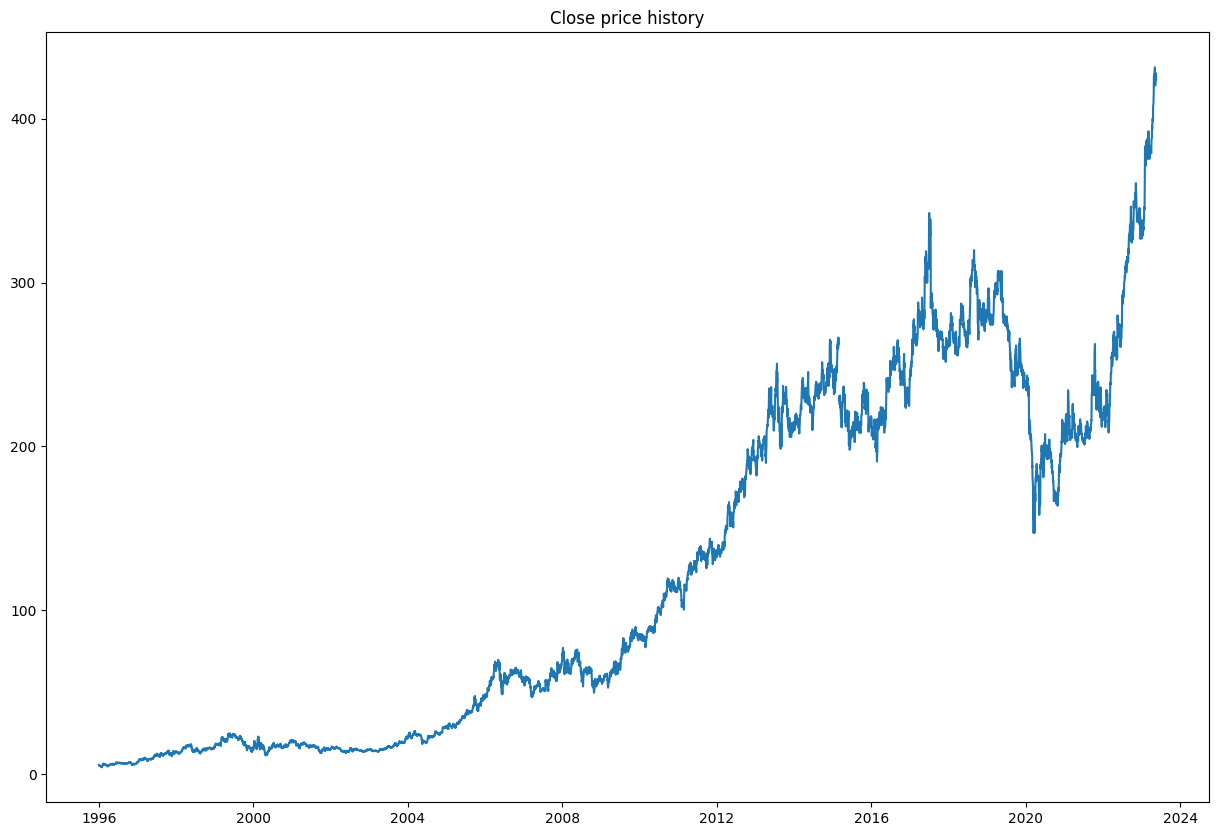

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

import keras 
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
df=pd.read_csv('ITC.NS.csv')
df.head()
df.tail()
df.shape
df["Date"]=pd.to_datetime(df.Date,format="%d-%m-%Y")
df.index=df['Date']

plt.figure(figsize=(15,10))
plt.title("Close price history")
plt.plot(df["Close"])
data=df.sort_index(ascending=True,axis=0)

new_dataset=pd.DataFrame(index=range(0,len(df)),columns=["Date",'Close'])

for i in range(len(data)):
    new_dataset["Date"][i]=data["Date"][i]
    new_dataset["Close"][i]=data["Close"][i]
    
new_dataset=new_dataset.dropna()
new_dataset
scaler=MinMaxScaler()

final_dataset=new_dataset.values

train_data=final_dataset[:4000, :4000]
test_data=final_dataset[4000: , 4000:]
scaled_data=scaler.fit_transform(final_dataset[:,1:])
scaled_data
X_train_data, y_train_data = [], []
for i in range(60,len(train_data)):
    X_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
X_train_data,y_train_data=np.array(X_train_data),np.array(y_train_data)
X_train_data=np.reshape(X_train_data,(X_train_data.shape[0],X_train_data.shape[1],1))
X_train_data
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_data.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))


inputs_data = new_dataset[len(new_dataset) - len(test_data) - 60:].iloc[:, 1:].values
inputs_data = inputs_data.reshape(-1, 1)
inputs_data = scaler.fit_transform(inputs_data)

lstm_model.compile(loss='mean_squared_error', optimizer = 'adam')
lstm_model.fit(X_train_data,y_train_data, epochs=1, batch_size=1, verbose=2)
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)
predicted_closing_price